In [1]:
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

# Get the data 

In [2]:
# in this file is the url to the spreadsheet with the data
# PIGLEG_SPREADSHEET_URL=https://docs.google.com/spreadsheets/d/1G55kXxcJ0...piLaK0snddRU-jzU/edit?usp=sharing
env_paths = list(Path(".").glob("../**/.env.dev"))
print(env_paths)
# find line with PIGLEG_SPREADSHEET_URL and give me the value after the "="
PIGLEG_SPREADSHEET_URL = [line.split("=", 1)[1].strip() for line in open(env_paths[0], "r") if line.startswith("PIGLEG_SPREADSHEET_URL")][0]
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("\"", "")
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?usp=sharing", "export?format=csv")
# PIGLEG_SPREADSHEET_URL

[WindowsPath('../.env.dev')]


In [3]:
import pandas as pd
url = PIGLEG_SPREADSHEET_URL
df = pd.read_csv(url)

In [4]:
df.tail()

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
1775,20240412_105857_1.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-24 16:48:57,hedro.yousef@uni-jena.de,2024-04-24 16:40,2024-04-24 14:48,30.0,"8,360277814","0,4904813459","1,52600086",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776,Prüfung_Johanna_Mundry.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-24 16:58:44,johanna.mundry@uni-jena.de,2024-04-22 18:48,2024-04-22 18:58,29.0,"9,846449822","1,87957818","3,100631642",...,True,True,True,True,True,5.0,4.0,4.0,3.0,0.0
1777,Prüfung_Johanna_Mundry.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-24 16:58:50,johanna.mundry@uni-jena.de,2024-04-22 18:48,2024-04-22 18:58,29.0,"9,846449822","1,87957818","3,100631642",...,True,True,True,True,True,5.0,4.0,4.0,3.0,0.0
1778,IMG_9724.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-05-15 12:08:39,luis.schneider@uni-jena.de,2024-05-15 11:53,2024-05-15 10:08,29.0,"26,46471303","0,1255759191","1,597464284",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,15_05_2024_NHT_Muenzner_Simeon.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-05-15 14:54:26,simeon.muenzner@uni-jena.de,2024-05-15 14:42,2024-05-15 12:54,29.0,"19,83379509","1,162417459","2,253716515",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## Select data

In [1]:
filename_contains_list=[
    "Good", "Medium", "Bad",
    "good", "medium", "bad",
    "Aslanifard, Roja",
"Barnikol, Erik", 
"Beutler, Marie-Louis",
"Brandis, Lea",
"Brockmann, Yelka",
"Di Vincenzo, Kim",
"Dost, Maximilian",
"Feldmann, Francis",
"Fischer, Henriette",
"Hoche, Erik",
"Holtz, Ben-Ole",
"Hübner, Sascha",
"Kirschner, Lukas",
"Leheis, Anja",
"Nowaczyk, Sebastian",
"Pacher, Corinna",
"Ponnath, Pia",
"Reinhardt, Philipp",
"Römer, Robert",
"Schaudig, Kilian",
"Singer, Hannes",
"Spangolo, Alena",
"Suckert, Iris",
"Thiel, Stephanie",
"Trübner, Ellen",
"Weidner, Stefanie",
"Wiedner, Georg",
"Wutzke, Katrin",
]

In [2]:
# remove all records with filename NA or NaN
dfs = df[df["filename"].notna()]
print(len(dfs))

# take all records with filename containing "Good", "Medium", "Bad", if the filename is the same, take the last one

# dfs = dfs[dfs["filename"].str.contains("Good|Medium|Bad")].drop_duplicates(subset=["filename"], keep="last")

# take the records uploaded after 2024-02-01
# uploaded_at to datetime
dfs["uploaded_at"] = pd.to_datetime(dfs["uploaded_at"])
dfs["timestamp"] = pd.to_datetime(dfs["timestamp"])
# dfs = dfs[dfs["uploaded_at"] > "2024-02-01"]
dfs = dfs[dfs["timestamp"] > "2024-02-05 22:19:59"]

# dfs = dfs[dfs["filename"].str.contains("Einzelknopfnaht")].drop_duplicates(subset=["filename"], keep="last")
dfs = dfs[dfs["filename"].str.contains("|".join(filename_contains_list))].drop_duplicates(subset=["filename"], keep="last")



print(len(dfs))
dfs["filename"]

NameError: name 'df' is not defined

In [8]:
# add column "stars_auto" with 0 for "Good", 1 for "Medium", 2 for "Bad"

# dfs["stars_auto"] = dfs["filename"].str.contains("Good").astype(int) * 0
# dfs["stars_auto"] = dfs["filename"].str.contains("Bad").astype(int) * 2
# dfs["stars_auto"] = dfs["filename"].str.contains("Medium").astype(int) * 1
dfs["stars_auto_filename"] = dfs["filename"].str.contains("Good|good").astype(int) * 5 + dfs["filename"].str.contains("Bad|bad").astype(int) * 1 + dfs["filename"].str.contains("Medium|medium").astype(int) * 3
# dfs["stars_auto"] = dfs["annotation_annotation_stars"]
# dfs["filename"].str.contains("Good|Medium|Bad")


In [9]:
dfs["annotation_annotation_stars"]

1661    2.0
1663    2.0
1665    2.0
1666    2.0
1667    2.0
1675    2.0
1680    1.0
1681    2.0
1682    2.0
1683    1.0
1684    1.0
1695    2.0
1696    3.0
1697    2.0
1698    3.0
1699    3.0
1700    3.0
1701    3.0
1702    4.0
1704    2.0
1705    1.0
1706    2.0
1708    1.0
1738    3.0
1739    1.0
1740    2.0
1741    2.0
1742    2.0
1743    2.0
1744    2.0
1745    1.0
1746    2.0
1748    2.0
1749    2.0
1750    2.0
1751    2.0
1752    2.0
1755    2.0
1756    2.0
1757    2.0
1758    2.0
1759    1.0
1760    2.0
1761    2.0
1762    2.0
1763    1.0
1764    2.0
1765    2.0
1766    2.0
1767    2.0
1768    2.0
Name: annotation_annotation_stars, dtype: float64

In [276]:
len(dfs)

51

In [277]:
dfs

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i,stars_auto_filename
1650,"Stresstest Aslanifard, Roja.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-13 18:04:27,mjirik@kky.zcu.cz,2024-02-04 15:41:00,2024-02-04 16:46,NaN,NaN,NaN,NaN,...,True,True,True,True,4.0,3.0,1.0,1.0,0.0,0
1652,"Stresstest Barnikol, Erik.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-13 18:06:55,mjirik@kky.zcu.cz,2024-02-04 15:41:00,2024-02-04 18:01,NaN,NaN,NaN,NaN,...,True,True,True,True,2.0,2.0,3.0,2.0,0.0,0
1653,"Stresstest Beutler, Marie-Louise.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-13 18:11:37,mjirik@kky.zcu.cz,2024-02-04 15:41:00,2024-02-04 18:07,NaN,NaN,NaN,NaN,...,True,True,False,True,2.0,2.0,2.0,2.0,0.0,0
1654,"Stresstest Brandis, Lea.MOV",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-13 18:13:01,mjirik@kky.zcu.cz,2024-02-04 15:41:00,2024-02-04 19:10,NaN,NaN,NaN,NaN,...,True,True,False,True,2.0,2.0,1.0,2.0,0.0,0
1661,Medium-Schweinefu_.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-05 14:58:24,Khalatbari.sadaf@gmail.com,2022-08-01 09:18:00,2024-03-01 01:16,25.0,"3,351523856","0,09984866267","0,4751089621",...,True,True,True,True,2.0,1.0,2.0,2.0,0.0,3
1663,Medium-RPReplay_Final1634048018.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-05 15:06:40,Khalatbari.sadaf@gmail.com,2022-08-01 09:14:00,2024-03-01 01:16,25.0,"3,842701629","0,2265873609","0,7560389571",...,False,True,True,True,2.0,2.0,1.0,1.0,0.0,3
1665,Good-Schweinefu__Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-08 15:17:45,Khalatbari.sadaf@gmail.com,2022-08-01 08:58:00,2024-03-01 01:04,25.0,"4,724965449","0,5146864273","2,325859615",...,True,True,True,True,2.0,2.0,2.0,2.0,0.0,5
1666,Good-Schmidt_Elisabeth_Einzelknotennaht_11_10_...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-08 15:25:53,Khalatbari.sadaf@gmail.com,2022-08-01 08:56:00,2024-03-01 00:53,25.0,"2,451676276","0,4474736679","1,435465307",...,True,True,True,True,2.0,1.0,2.0,2.0,0.0,5
1667,Good-162880einzelknopf.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-08 17:11:38,Khalatbari.sadaf@gmail.com,2022-08-01 08:49:00,2024-03-01 01:04,60.0,"13,39699385","0,8178103169","0,073813431",...,True,True,False,True,1.0,2.0,2.0,1.0,0.0,5
1675,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-04-09 07:56:20,khalatbari.sadaf@gmail.com,2022-07-07 16:48:00,2024-02-29 23:12,25.0,"1,751796896","0,4019109425","0,6630233564",...,True,True,True,True,3.0,3.0,2.0,2.0,0.0,3


In [278]:
import seaborn as sns

<AxesSubplot: xlabel='annotation_annotation_stars', ylabel='count'>

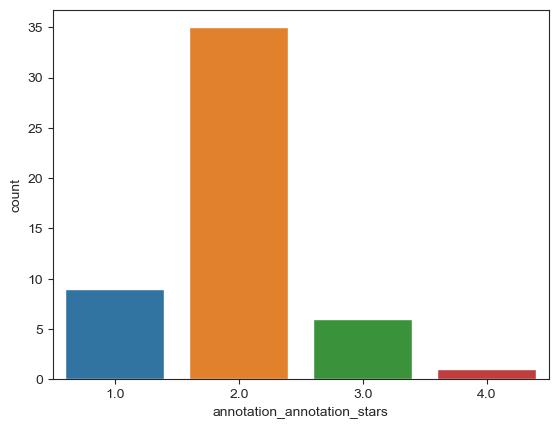

In [279]:

sns.countplot(dfs, x="annotation_annotation_stars")


In [280]:
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'annotation_annotation_distance_between_stitches_is_correct',
       'annotation_annotation_stitches_perpendicular_to_wound',
       'annotation_annotation_equal_sized_wound_portions',
       'annotation_annotation_no_excessive_tension',
       'annotation_annotation_respect_for_tissue',
       'annotation_annotation_time_and_movements',
       'annotation_annotation_instrument_handling',
       'annotation_annotation_procedure_flow', 'annotation_annotation_i',
       'stars_auto_filename'],
      dtype='object', length=486)

### Replace "," with "."

In [281]:
# find the columns where its values contain single "," and digits
dfs.columns[dfs.apply(lambda x: (x.dtype is str) and (x.str.contains(",\d").any()))]
cols = []
for col in dfs.columns:
    try:
        if (dfs[col].str.contains(",\d").any()):
            # convert , to . and change the column type to float
            dfs[col] = dfs[col].str.replace(",", ".").astype(float)
            cols.append(col)
    except:
        pass
# cols

In [282]:
# dfs

In [283]:
# print name of columns containing needle holder
# dfs.columns[dfs.columns.str.contains("Needle holder")]

In [284]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]

### Convert bool to the numeric


In [289]:
# get list of columns containing "annotation_annotation" in their name
cols = dfs.columns[dfs.columns.str.contains("annotation_annotation")]
# dfs["annotation_annotation_knots_are_done_right"] = dfs["annotation_annotation_knots_are_done_right"].astype(float)
# get type of the columns
dfs[cols].dtypes

for col in cols:
    uni = dfs[col].unique()
    # print(uni)
    
    if (len(list(uni))==2) and (True in uni) and (False in uni):
        dfs[col] = dfs[col].astype(float)
    else:
        print(f"skipped: {col}")



skipped: annotation_annotation
skipped: annotation_annotation_annotation
skipped: annotation_annotation_stars
skipped: annotation_annotation_annotator
skipped: annotation_annotation_updated_at
skipped: annotation_annotation_id
skipped: annotation_annotation_created_at
skipped: annotation_annotation_respect_for_tissue
skipped: annotation_annotation_time_and_movements
skipped: annotation_annotation_instrument_handling
skipped: annotation_annotation_procedure_flow


In [290]:
assert sorted(list(dfs["annotation_annotation_knots_are_done_right"].unique())) == [0.0, 1.0]

### If there is just one stitch, put ths information into stitch 1 measurements

In [291]:
# If column containing " stitch 1" in its name has empty values, fill them with  the values from the column with the same name but withuou " stitch 1"
for col in dfs.columns[dfs.columns.str.contains(" stitch 0")]:
    dfs[col] = dfs[col].fillna(dfs[col.replace(" stitch 0", "")])

In [292]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]


### Remove rows and columns with lot of NaN values

In [293]:
# get numeric columns from dfs
# numeric_cols = dfs.columns[dfs.apply(lambda x: x.dtype is float).any()]


# dfs[numeric_cols].isna().sum(axis=1)


# Find the correlation

In [294]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()
relevant_column = "annotation_annotation_stars"
# df

In [295]:
# remove columns containing " stitch 1" in their name
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [296]:
dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False)
dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False)["Needle holder stitch 0 length [m]"]



0.23399296715541215

## Find the best columns to predict annotation_annotation_stars

In [297]:

dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False)


annotation_annotation_stars                  1.000000
annotation_annotation_procedure_flow         0.763900
annotation_annotation_time_and_movements     0.712405
annotation_annotation_instrument_handling    0.562254
annotation_annotation_respect_for_tissue     0.467462
                                               ...   
Forceps curved stitch 0 velocity                  NaN
Forceps curved stitch 0 unit                      NaN
Forceps curved stitch 0 visibility [%]            NaN
Forceps curved stitch 0 area presence [%]         NaN
Forceps curved stitch 0 length [pix]              NaN
Name: annotation_annotation_stars, Length: 151, dtype: float64

In [298]:
# try to find the best columns to predict stars_auto
corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(10)
# corr = corr[corr.index != "stars_auto"] 

corr

annotation_annotation_stars                            1.000000
annotation_annotation_procedure_flow                   0.763900
annotation_annotation_time_and_movements               0.712405
annotation_annotation_instrument_handling              0.562254
annotation_annotation_respect_for_tissue               0.467462
stars_auto_filename                                    0.439247
annotation_annotation_needle_pierced_at_right_angle    0.369175
Needle holder stitch 0 visibility [%]                  0.363906
n_stitches_by_user                                     0.358122
Stitch 0 duration [%]                                  0.336876
Name: annotation_annotation_stars, dtype: float64

In [299]:
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# measurement_vs_annotation_separator = dfs.columns.str.contains("annotation_annotation")
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# # corr on one axis measurement, on the other annotation, just the first 10
# corr = dfs.corr(numeric_only=True).abs()
# corr





In [300]:
#select the columns containing "annotation_annotation" in their name
measurement_vs_annotation_separator = corr.index.str.contains("annotation_annotation")
measurement_vs_annotation_separator

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False])

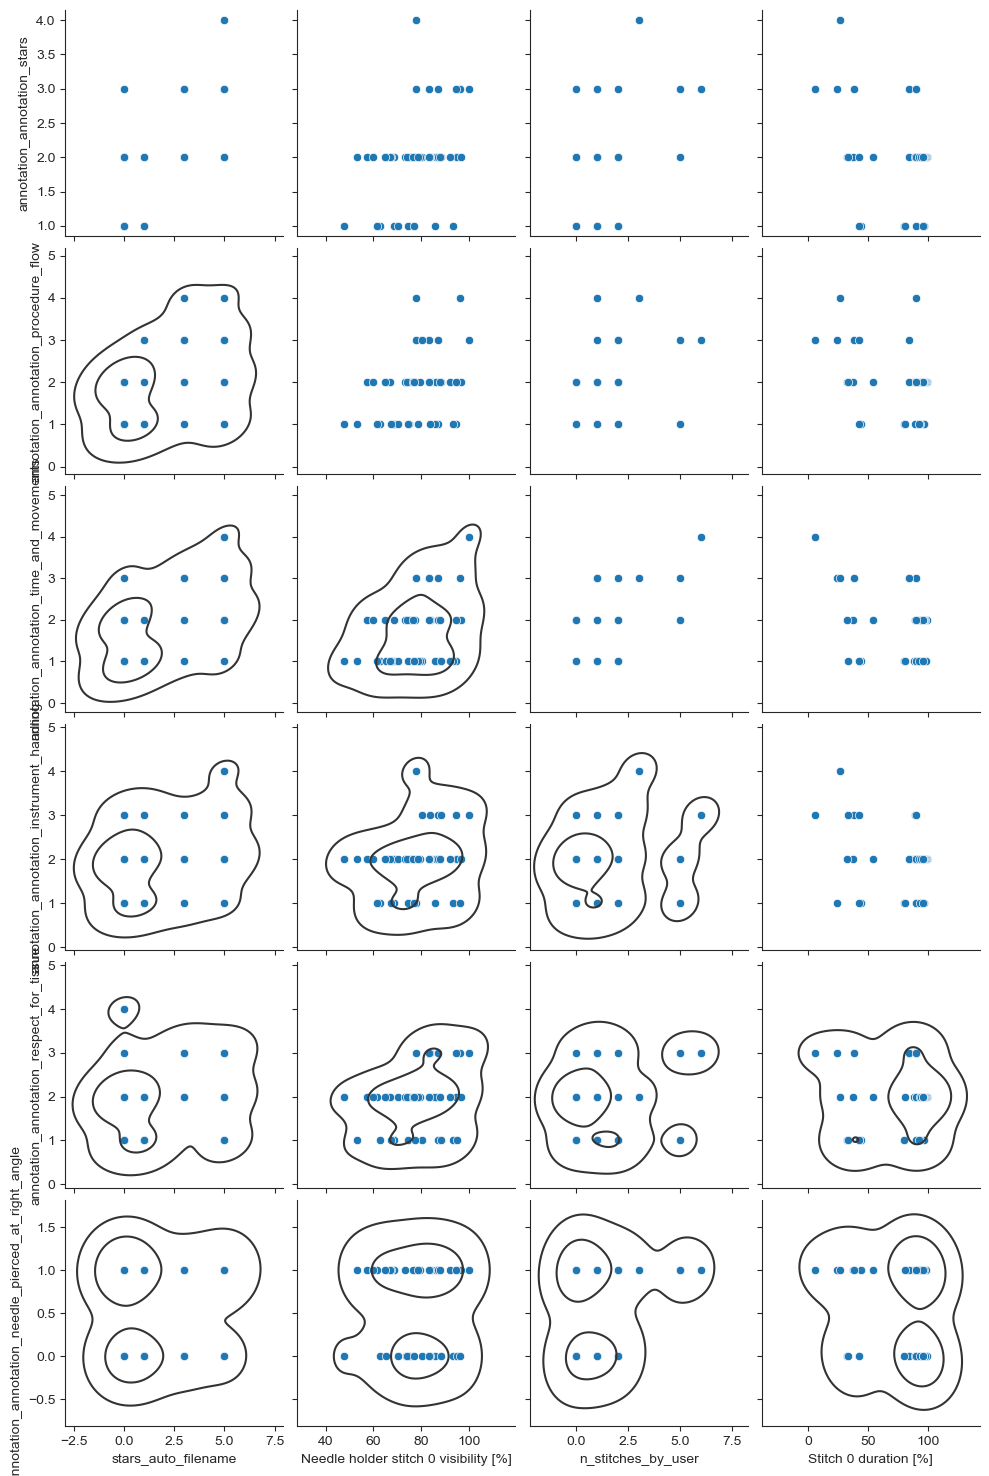

In [301]:
import seaborn as sns
g = sns.pairplot(dfs, y_vars=corr.index[measurement_vs_annotation_separator], 
             x_vars=corr.index[~measurement_vs_annotation_separator],
             # x_vars=["stars_auto"]
             # hue="n_stitches_by_user"
             )
g.map_lower(sns.kdeplot, levels=3, color=".2")

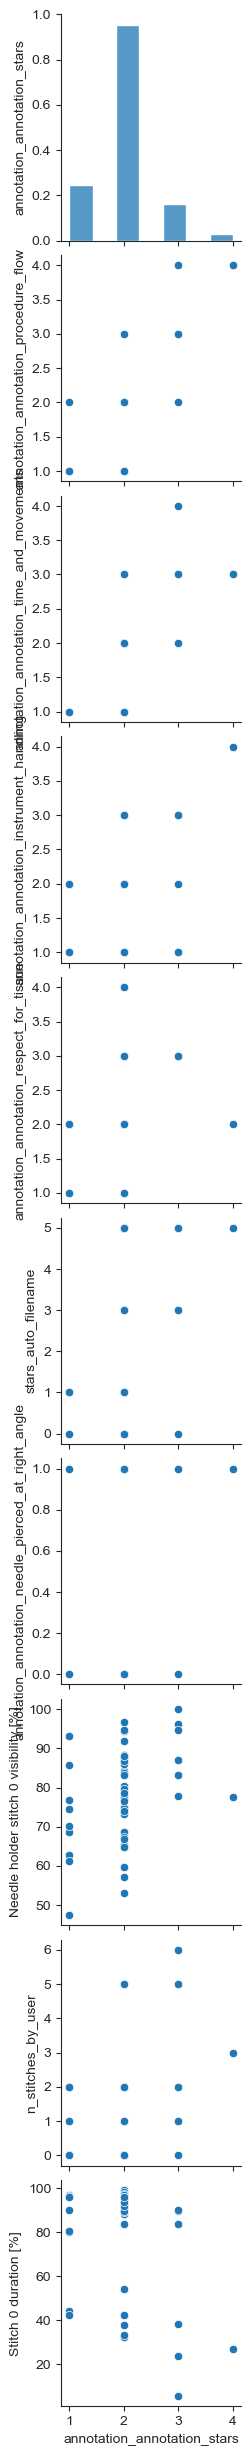

In [305]:

sns.pairplot(dfs, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=["annotation_annotation_stars"]
             )


In [306]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [307]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

## Find general correlation



In [308]:
cols

Index(['annotation_annotation', 'annotation_annotation_annotation',
       'annotation_annotation_stars', 'annotation_annotation_annotator',
       'annotation_annotation_updated_at', 'annotation_annotation_id',
       'annotation_annotation_created_at',
       'annotation_annotation_needle_grabbed_correctly',
       'annotation_annotation_needle_holder_stabilized',
       'annotation_annotation_needle_pierced_at_first_try',
       'annotation_annotation_needle_pierced_at_right_angle',
       'annotation_annotation_needle_rotated_correctly_on_opposite_side',
       'annotation_annotation_needle_rotated_correctly_on_students_side',
       'annotation_annotation_forceps_grabs_the_edge',
       'annotation_annotation_three_knots_per_stitch',
       'annotation_annotation_knots_are_done_right',
       'annotation_annotation_threads_shortened_appropriately',
       'annotation_annotation_stitch_to_wound_distance_is_correct',
       'annotation_annotation_distance_between_stitches_is_correct

In [309]:
list(cols)

['annotation_annotation',
 'annotation_annotation_annotation',
 'annotation_annotation_stars',
 'annotation_annotation_annotator',
 'annotation_annotation_updated_at',
 'annotation_annotation_id',
 'annotation_annotation_created_at',
 'annotation_annotation_needle_grabbed_correctly',
 'annotation_annotation_needle_holder_stabilized',
 'annotation_annotation_needle_pierced_at_first_try',
 'annotation_annotation_needle_pierced_at_right_angle',
 'annotation_annotation_needle_rotated_correctly_on_opposite_side',
 'annotation_annotation_needle_rotated_correctly_on_students_side',
 'annotation_annotation_forceps_grabs_the_edge',
 'annotation_annotation_three_knots_per_stitch',
 'annotation_annotation_knots_are_done_right',
 'annotation_annotation_threads_shortened_appropriately',
 'annotation_annotation_stitch_to_wound_distance_is_correct',
 'annotation_annotation_distance_between_stitches_is_correct',
 'annotation_annotation_stitches_perpendicular_to_wound',
 'annotation_annotation_equal_si

In [310]:
# try to find the best columns to predict stars_auto


corr = dfs.corr(numeric_only=True)
numeric_cols = corr.columns[corr.columns.str.contains("annotation_annotation")]
corr = corr[numeric_cols].abs()# .sort_values(by="annotation_annotation_stars", ascending=False).head(10)
# keep just rows not containing "annotation_annotation" in the index
corr = corr[~corr.index.str.contains("annotation_annotation")]

# [list(cols)].abs()# .sort_values(ascending=False).head(10)
# corr = corr[corr.index != "stars_auto"] 

corr

,annotation_annotation_stars,annotation_annotation_id,annotation_annotation_needle_grabbed_correctly,annotation_annotation_needle_holder_stabilized,annotation_annotation_needle_pierced_at_first_try,annotation_annotation_needle_pierced_at_right_angle,annotation_annotation_needle_rotated_correctly_on_opposite_side,annotation_annotation_needle_rotated_correctly_on_students_side,annotation_annotation_forceps_grabs_the_edge,annotation_annotation_three_knots_per_stitch,...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
fps,0.057710,0.153598,0.028221,0.047832,0.004461,0.075943,0.063904,0.135352,0.096049,0.277577,...,0.078599,0.019391,0.042364,0.061960,0.035844,0.062472,0.103676,0.014209,0.018903,0.024017
Needle holder length [m],0.098443,0.448145,0.192226,0.426560,0.274562,0.110391,0.335171,0.060582,0.119132,0.213167,...,0.132985,0.417669,0.150048,0.085487,0.210091,0.128034,0.171296,0.000737,0.021612,0.406419
Scissors length [m],0.177458,0.357064,0.154983,0.353819,0.048558,0.054214,0.209504,0.247857,0.268644,0.171345,...,0.068310,0.283016,0.103569,0.080355,0.093489,0.079239,0.113606,0.090229,0.017431,0.303175
Forceps length [m],0.135052,0.069855,0.130507,0.128535,0.078624,0.002601,0.140940,0.047920,0.011148,0.152697,...,0.089335,0.136371,0.156424,0.148627,0.140810,0.004152,0.121292,0.047083,0.185527,0.186474
Needle holder visibility [s],0.053754,0.390411,0.029397,0.417291,0.347248,0.204690,0.418551,0.145847,0.135778,0.205036,...,0.195157,0.462943,0.139948,0.087367,0.226519,0.045817,0.016282,0.034079,0.054452,0.362151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Forceps curved stitch 0 unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forceps curved stitch 0 visibility [%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forceps curved stitch 0 area presence [%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forceps curved stitch 0 length [pix],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
# argmax in dataframe
corr.loc[corr.idxmax()]

,annotation_annotation_stars,annotation_annotation_id,annotation_annotation_needle_grabbed_correctly,annotation_annotation_needle_holder_stabilized,annotation_annotation_needle_pierced_at_first_try,annotation_annotation_needle_pierced_at_right_angle,annotation_annotation_needle_rotated_correctly_on_opposite_side,annotation_annotation_needle_rotated_correctly_on_students_side,annotation_annotation_forceps_grabs_the_edge,annotation_annotation_three_knots_per_stitch,...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
stars_auto_filename,0.439247,0.358587,0.116021,0.265285,0.173085,0.027634,0.518976,0.232042,0.163634,0.228944,...,0.318510,0.528878,0.504724,0.030065,0.503140,0.195176,0.444563,0.221422,0.331492,0.355319
qr_data_pix_size_single_frame_detector_m,0.256123,0.653340,0.296248,0.144614,0.098137,0.078456,0.104221,0.076197,0.087820,0.161934,...,0.078018,0.104734,0.087205,0.076332,0.034959,0.255614,0.226383,0.087622,0.287031,0.303496
Needle holder visibility [%],0.239386,0.291410,0.372107,0.234912,0.046032,0.042951,0.059539,0.116380,0.041796,0.020844,...,0.089579,0.084495,0.092980,0.179725,0.095656,0.285344,0.245125,0.053027,0.214980,0.196798
duration_s_tracking,0.108056,0.500097,0.050354,0.553984,0.271825,0.143456,0.574142,0.225705,0.148278,0.321583,...,0.266795,0.547352,0.252592,0.092950,0.357032,0.010448,0.186541,0.001867,0.068255,0.579404
Left hand bbox velocity,0.029935,0.264554,0.051702,0.337971,0.481725,0.223894,0.256933,0.112891,0.154518,0.105128,...,0.052837,0.281176,0.279844,0.050086,0.137546,0.140670,0.246969,0.138689,0.085818,0.455671
Forceps bbox area presence [%],0.048855,0.125776,0.168777,0.199582,0.157130,0.389521,0.331541,0.097553,0.239325,0.176122,...,0.028875,0.280539,0.106030,0.053147,0.097398,0.070667,0.118561,0.099199,0.106933,0.320230
Needle holder stitch 0 visibility [s],0.154024,0.406410,0.069397,0.537785,0.210803,0.121993,0.603778,0.285789,0.090898,0.216525,...,0.325811,0.596814,0.425639,0.020319,0.535860,0.070621,0.252800,0.046621,0.163927,0.639522
Forceps velocity,0.095470,0.400256,0.250232,0.067467,0.003396,0.127097,0.162962,0.366609,0.146043,0.319588,...,0.077621,0.065271,0.087528,0.201910,0.002774,0.007691,0.092969,0.077383,0.223086,0.099852
orig frame_height,0.100997,0.004559,0.224523,0.371381,0.011659,0.306823,0.153987,0.161394,0.355169,0.279142,...,0.317366,0.339439,0.193910,0.105642,0.147740,0.176218,0.121186,0.188417,0.008719,0.314492
qr_data_size_by_scene,0.227089,0.023594,0.138313,0.238445,0.121456,0.178988,0.150613,0.096035,0.283610,0.427327,...,0.126898,0.266733,0.302964,0.091170,0.266733,0.208571,0.139683,0.207446,0.162698,0.215353


In [312]:
dfs[["annotation_annotation_knots_are_done_right", 'filename']]

,annotation_annotation_knots_are_done_right,filename
1650,1.0,"Stresstest Aslanifard, Roja.mp4"
1652,1.0,"Stresstest Barnikol, Erik.mp4"
1653,1.0,"Stresstest Beutler, Marie-Louise.mp4"
1654,0.0,"Stresstest Brandis, Lea.MOV"
1661,1.0,Medium-Schweinefu_.mp4
1663,1.0,Medium-RPReplay_Final1634048018.mp4
1665,1.0,Good-Schweinefu__Einzelknopfnaht.mp4
1666,1.0,Good-Schmidt_Elisabeth_Einzelknotennaht_11_10_...
1667,0.0,Good-162880einzelknopf.mp4
1675,1.0,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...


# Train predictor

In [313]:
print(corr.shape)
corr = corr.dropna()
print(corr.shape)


(129, 22)
(102, 22)


In [314]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
#train a model to predict stars_auto

predicted_columns = list(corr.columns[corr.columns.str.contains("annotation_annotation")])
columns = list(corr.index[~corr.index.str.contains("annotation_annotation")])
# columns = list(corr.index)
columns.append("filename")
print(predicted_columns)
print(columns)



['annotation_annotation_stars', 'annotation_annotation_id', 'annotation_annotation_needle_grabbed_correctly', 'annotation_annotation_needle_holder_stabilized', 'annotation_annotation_needle_pierced_at_first_try', 'annotation_annotation_needle_pierced_at_right_angle', 'annotation_annotation_needle_rotated_correctly_on_opposite_side', 'annotation_annotation_needle_rotated_correctly_on_students_side', 'annotation_annotation_forceps_grabs_the_edge', 'annotation_annotation_three_knots_per_stitch', 'annotation_annotation_knots_are_done_right', 'annotation_annotation_threads_shortened_appropriately', 'annotation_annotation_stitch_to_wound_distance_is_correct', 'annotation_annotation_distance_between_stitches_is_correct', 'annotation_annotation_stitches_perpendicular_to_wound', 'annotation_annotation_equal_sized_wound_portions', 'annotation_annotation_no_excessive_tension', 'annotation_annotation_respect_for_tissue', 'annotation_annotation_time_and_movements', 'annotation_annotation_instrument

### Remove NA values

In [315]:
# remove known problematic columns

# remove row with index 1708
if 1708 in dfs.index:
    dfs = dfs.drop(1708)

if 1667 in dfs.index:
    dfs = dfs.drop(1667)

# remove "qr_data_pix_size_single_frame_detector_m" from the columns
if "qr_data_pix_size_single_frame_detector_m" in columns:
    columns.remove("qr_data_pix_size_single_frame_detector_m")

# dfs[cols].isna().sum()


In [316]:

# count NA values in columns

dfs[columns].isna().sum().sort_values(ascending=False)


Forceps bbox visibility [s]             14
Forceps bbox stitch 0 visibility [%]    14
Forceps bbox velocity                   14
Forceps bbox visibility [%]             14
Forceps bbox area presence [%]          14
                                        ..
Scissors bbox velocity                   4
Scissors bbox visibility [s]             4
Scissors bbox length [m]                 4
stars_auto_filename                      0
filename                                 0
Length: 102, dtype: int64

In [319]:

dfs[cols].isna().sum(axis=1).sort_values(ascending=False)


1650    100
1653    100
1654    100
1652    100
1730     12
1728     12
1727     12
1733     10
1718     10
1736     10
1716     10
1723     10
1729     10
1715     10
1735      2
1714      2
1720      2
1726      0
1725      0
1732      0
1722      0
1721      0
1719      0
1717      0
1734      0
1731      0
1706      0
1713      0
1705      0
1661      0
1663      0
1665      0
1666      0
1675      0
1680      0
1681      0
1682      0
1683      0
1684      0
1695      0
1696      0
1697      0
1698      0
1699      0
1700      0
1701      0
1702      0
1704      0
1737      0
dtype: int64

In [318]:

results = {}
for predicted_column in predicted_columns:
# if True:
#     predicted_column = "annotation_annotation_stars"
    cols = columns.copy()
    cols.append(predicted_column)

    dfsx = dfs[cols].copy()
    l1 = len(dfsx)
    dfsx = dfsx.dropna()
    l2 = len(dfsx)
    assert l1 == l2, "There are still NA values in the data"
    X = dfsx[columns].drop("filename", axis=1)
    # X = X.drop(predicted_column, axis=1)
    y = dfsx[predicted_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # clf = SVR()
    # clf.fit(X_train, y_train)
    # clf.score(X_test, y_test)
    # 
    # X
    from sklearn.neural_network import MLPClassifier
    # X = [[0., 0.], [1., 1.]]
    # y = [0, 1]
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    results[predicted_column] = {"score": clf.score(X_test, y_test), "model": clf}
    print(predicted_column, clf.score(X_test, y_test))



AssertionError: There are still NA values in the data

fps                                    0
Needle holder length [m]               0
Scissors length [m]                    0
Forceps length [m]                     0
Needle holder visibility [s]           0
                                      ..
Scissors stitch 0 area presence [%]    0
stars_auto_filename                    0
filename                               0
annotation_annotation_stars            0
filename                               0
Length: 104, dtype: int64

In [225]:
dfs[cols]# dfsx

,fps,Needle holder length [m],Scissors length [m],Forceps length [m],Needle holder visibility [s],Needle holder visibility [%],Forceps visibility [s],Forceps visibility [%],Scissors visibility [s],Scissors visibility [%],...,Forceps curved stitch 0 length [m],Forceps curved stitch 0 visibility [s],Forceps curved stitch 0 velocity,Forceps curved stitch 0 unit,Forceps curved stitch 0 visibility [%],Forceps curved stitch 0 area presence [%],Forceps curved stitch 0 length [pix],stars_auto_filename,filename,annotation_annotation_stars
1661,25.0,3.351524,0.099849,0.475109,91.866667,87.325729,9.733333,9.252218,1.466667,1.394170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Medium-Schweinefu_.mp4,2.0
1663,25.0,3.842702,0.226587,0.756039,116.666667,76.120052,43.666667,28.490648,5.600000,3.653763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Medium-RPReplay_Final1634048018.mp4,2.0
1665,25.0,4.724965,0.514686,2.325860,133.200000,75.254237,97.266667,54.952919,78.200000,44.180791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Good-Schweinefu__Einzelknopfnaht.mp4,2.0
1666,25.0,2.451676,0.447474,1.435465,125.133333,90.067178,74.866667,53.886756,134.933333,97.120921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Good-Schmidt_Elisabeth_Einzelknotennaht_11_10_...,2.0
1667,60.0,13.396994,0.817810,0.073813,377.266667,68.768988,4.600000,0.838498,115.666667,21.083971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Good-162880einzelknopf.mp4,2.0
1675,25.0,1.751797,0.401911,0.663023,46.466667,83.874850,45.266667,81.708785,64.466667,116.365824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,2.0
1680,25.0,6.315051,0.580233,3.683914,206.733333,71.600092,183.000000,63.380282,219.933333,76.171785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...,1.0
1681,25.0,2.934255,0.344843,0.751515,96.866667,95.529257,52.733333,52.005260,103.933333,102.498356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,2.0
1682,25.0,4.207810,0.491188,1.301967,109.266667,87.787895,56.800000,45.634708,134.600000,108.141403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...,2.0
1683,25.0,3.878707,0.111643,0.109426,98.066667,85.772595,3.066667,2.682216,4.066667,3.556851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...,1.0


## Score

In [29]:
clf.score(X_test, y_test)

NameError: name 'clf' is not defined

In [30]:
clf.score(X_train, y_train)

NameError: name 'clf' is not defined

## Check the předictions

In [149]:
y_test

922    2
928    0
939    0
924    2
Name: stars_auto, dtype: int32

In [150]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 0])

In [113]:
clf.predict(X_train)


array([0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1])

In [114]:
y_train

933    1
945    0
926    2
942    2
944    2
947    2
925    2
934    0
948    0
927    2
940    0
931    1
938    1
943    0
930    1
Name: stars_auto, dtype: int32

In [117]:

# sns.histplot(dfs, x="n_stitches_by_user")
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Scissors stitch 0 area presence [%]',
       'Needle holder stitch 0 length [pix]', 'Forceps stitch 0 length [pix]',
       'Scissors stitch 0 length [pix]',
       'Needle holder bbox stitch 0 length [pix]',
       'Forceps bbox stitch 0 length [pix]',
       'Scissors bbox stitch 0 length [pix]',
       'Left hand bbox stitch 0 length [pix]',
       'Right hand bbox stitch 0 length [pix]', 'stars_auto'],
      dtype='object', length=218)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

816    2
842    0
840    0
822    2
Name: stars_auto, dtype: int32

<AxesSubplot: xlabel='n_stitches_by_user', ylabel='Count'>

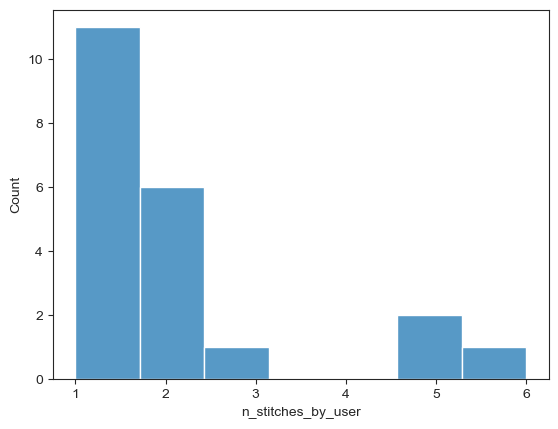

In [146]:
sns.histplot(dfs, x="n_stitches_by_user", 
             # hue="stars_auto"
             )